In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
mental_2014 = pd.read_csv('survey.csv')
mental_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Data Cleaning

In [3]:
# Dropping unneeded columns

mental_2014 = mental_2014.drop(labels=['Timestamp', 'Country', 'state', 'self_employed', 'obs_consequence', 'comments', 'phys_health_consequence', 'phys_health_interview', 'work_interfere', 'mental_health_interview'], axis=1)
mental_2014.shape

(1259, 17)

In [4]:
mental_2014.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
1,44,M,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know
2,32,Male,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Male,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
4,31,Male,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Don't know


In [5]:
mental_2016 = pd.read_csv('mental_2016.csv')
mental_2016.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,39,Male,No,0,26-100,Sometimes,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,Maybe,Yes,I don't know
1,29,male,Yes,1,6-25,Never,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,Maybe,Yes,Yes
2,38,Male,No,1,6-25,Always,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Maybe,I don't know
3,43,male,No,1,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43,Female,Yes,1,6-25,Sometimes,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,No,No


In [6]:
mental_2016.shape

(1433, 17)

In [7]:
mental_2019 = pd.read_csv('mental_2019.csv')
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?"
0,25,No,False,26-100,True,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,5.0,5.0
1,51,Yes,False,26-100,True,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,5.0,7.0
2,27,I don't know,False,26-100,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,5.0,4.0
3,37,Yes,False,100-500,True,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,1.0,3.0
4,46,No,False,26-100,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,4.0,4.0


In [8]:
mental_2019['treatment'] = mental_2019['treatment'].astype(int)
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?"
0,25,No,0,26-100,True,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,5.0,5.0
1,51,Yes,0,26-100,True,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,5.0,7.0
2,27,I don't know,0,26-100,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,5.0,4.0
3,37,Yes,0,100-500,True,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,1.0,3.0
4,46,No,0,26-100,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,4.0,4.0


In [9]:
mental_2019['tech_company'].fillna(value=False, inplace=True)
mental_2019['tech_company'] = mental_2019['tech_company'].astype(int)
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?"
0,25,No,0,26-100,1,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,5.0,5.0
1,51,Yes,0,26-100,1,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,5.0,7.0
2,27,I don't know,0,26-100,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,5.0,4.0
3,37,Yes,0,100-500,1,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,1.0,3.0
4,46,No,0,26-100,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,4.0,4.0


In [10]:
mental_2019['mental_vs_physical'] = mental_2019['Overall, how much importance does your employer place on physical health?'] < mental_2019['Overall, how much importance does your employer place on mental health?']
mental_2019.drop(columns=['Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?'], inplace=True)
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,25,No,0,26-100,1,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,False
1,51,Yes,0,26-100,1,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,True
2,27,I don't know,0,26-100,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,False
3,37,Yes,0,100-500,1,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,True
4,46,No,0,26-100,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,False


In [11]:
mental_2019['mental_vs_physical'] = mental_2019['mental_vs_physical'].replace({True:'Yes', False:'No'})
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,25,No,0,26-100,1,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,No
1,51,Yes,0,26-100,1,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,Yes
2,27,I don't know,0,26-100,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,No
3,37,Yes,0,100-500,1,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,Yes
4,46,No,0,26-100,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,No


In [12]:
mental_2016['supervisor'].unique()

array(['Yes', 'Maybe', nan, 'No'], dtype=object)

In [13]:
mental_2019['supervisor'].unique()

array(['Yes', 'Maybe', 'No', nan], dtype=object)

In [14]:
# Combining the two datasets

combined = pd.concat([mental_2014, mental_2016, mental_2019], axis=0)
combined.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
1,44,M,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know
2,32,Male,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Male,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
4,31,Male,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Don't know


In [15]:
# Removing 'Maybe' responses

responses = ['Yes', 'No']
combined = combined[combined['mental_vs_physical'].str.contains('|'.join(responses)) == True]

In [16]:
combined.shape

(1688, 17)

In [17]:
combined.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
2,32,Male,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Male,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
7,39,M,No,No,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No
8,42,Female,Yes,Yes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,Yes,Yes,No


In [18]:
# Fixing null values in 'care_options'

combined['care_options'] = combined['care_options'].str.replace('I am not sure', 'Not sure')
combined['care_options'].unique()

array(['Not sure', 'No', 'Yes', nan], dtype=object)

In [19]:
combined['care_options'].fillna(value='Not sure', inplace=True)
combined['care_options'].isna().sum()

0

In [20]:
combined.drop(columns=['Gender', 'remote_work'], inplace=True)
combined.rename(columns={'Age':'age'}, inplace=True)

In [21]:
combined.shape

(1688, 15)

In [22]:
combined.dropna(how='any').shape

(1581, 15)

In [23]:
combined.head()

,age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,No,Yes,6-25,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
2,32,No,No,6-25,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Yes,Yes,26-100,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
7,39,No,No,1-5,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No
8,42,Yes,Yes,100-500,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,Yes,Yes,No


## Model Building

In [24]:
from sklearn.model_selection import train_test_split

# split into train and test sets and dummy encode

X = pd.get_dummies(combined.drop(['mental_vs_physical'], axis=1))
y = [1 if i == 'Yes' else 0 for i in combined['mental_vs_physical']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=88)

train = X_train.copy()
train['mental_vs_physical'] = y_train

test = X_test.copy()
test['mental-vs_physical'] = y_test

X_train.shape, X_test.shape 

((1350, 58), (338, 58))

In [25]:
def TPR(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    return cm.ravel()[3]/ (cm.ravel()[3] + cm.ravel()[2])
def FPR(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    return cm.ravel()[1]/ (cm.ravel()[1] + cm.ravel()[0])

### Baseline

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
print('1:',np.count_nonzero(y_test))
print('0:',len(y_test) - np.count_nonzero(y_test))

1: 145
0: 193


In [28]:
# Baseline always predicts 0
y_pred_baseline = np.zeros(len(y_test))
print('Baseline ACC:', accuracy_score(y_test, y_pred_baseline))
print('Baseline TPR:', TPR(y_test, y_pred_baseline))
print('Baseline FPR:', FPR(y_test, y_pred_baseline))

Baseline ACC: 0.5710059171597633
Baseline TPR: 0.0
Baseline FPR: 0.0


### Logistic Regression

In [30]:
# fit logistic regression model
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)

y_prob = logreg.predict_proba(X_test)
y_pred_logreg = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]])

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print ("Confusion Matrix: \n", cm_logreg)
print ("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print ("TPR:", TPR(y_test, y_pred_logreg))
print ("FPR:", FPR(y_test, y_pred_logreg))

Confusion Matrix: 
 [[164  29]
 [ 35 110]]
Accuracy: 0.8106508875739645
TPR: 0.7586206896551724
FPR: 0.15025906735751296


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# first try grid search for best ccp_alpha
grid_values = {'ccp_alpha': np.linspace(0, 0.1, 51)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

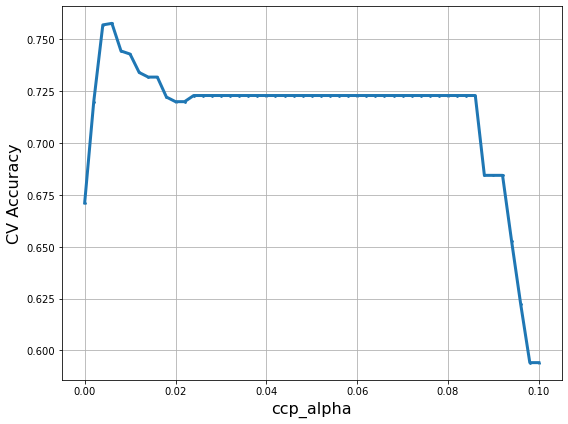

Best ccp_alpha {'ccp_alpha': 0.006}


In [32]:
# plot ccp_alpha values from grid search first try
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [33]:
# second try grid search for best ccp_alpha
grid_values = {'ccp_alpha': np.linspace(0, 0.01, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

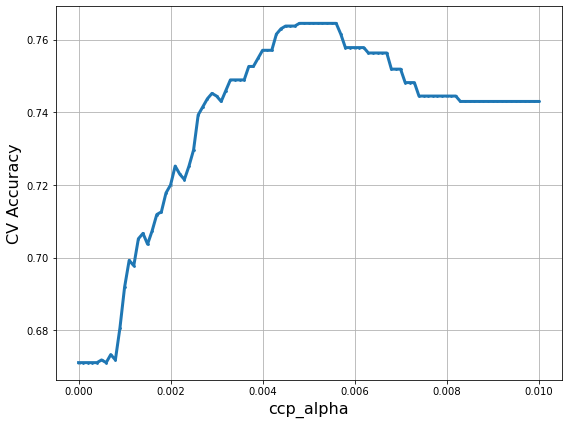

Best ccp_alpha {'ccp_alpha': 0.0048000000000000004}


In [34]:
# plot ccp_alpha values from grid search second try
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [35]:
y_pred_dtc = dtc_cv.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print ("Confusion Matrix: \n", cm_dtc)
print ("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print ("TPR:", TPR(y_test, y_pred_dtc))
print ("FPR:", FPR(y_test, y_pred_dtc))

Confusion Matrix: 
 [[160  33]
 [ 32 113]]
Accuracy: 0.8076923076923077
TPR: 0.7793103448275862
FPR: 0.17098445595854922


### Vanilla Bagging

In [36]:
from sklearn.ensemble import RandomForestClassifier

# random forest model with max_features set to the total number of features 

bagging = RandomForestClassifier(max_features=len(X_train.columns), random_state=1)
bagging.fit(X_train, y_train)

RandomForestClassifier(max_features=58, random_state=1)

In [37]:
y_pred_bagging = bagging.predict(X_test)
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
print ("Confusion Matrix: \n", cm_bagging)
print ("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print ("TPR:", TPR(y_test, y_pred_bagging))
print ("FPR:", FPR(y_test, y_pred_bagging))

Confusion Matrix: 
 [[163  30]
 [ 36 109]]
Accuracy: 0.8047337278106509
TPR: 0.7517241379310344
FPR: 0.15544041450777202


### Random Forest

In [38]:
# grid search for max_features
grid_values = {'max_features': np.linspace(1,8,8, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5, verbose=1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             verbose=1)

In [39]:
y_pred_rf = rf_cv.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print ("Confusion Matrix: \n", cm_rf)
print ("Accuracy:", accuracy_score(y_test, y_pred_rf))
print ("TPR:", TPR(y_test, y_pred_rf))
print ("FPR:", FPR(y_test, y_pred_rf))

Confusion Matrix: 
 [[171  22]
 [ 40 105]]
Accuracy: 0.8165680473372781
TPR: 0.7241379310344828
FPR: 0.11398963730569948


### Linear SVM

In [40]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# grid search for C

grid_values = {'C': np.logspace(-2,2,10),
               'penalty': ['l2'],
               'loss': ['hinge']} 

tic = time.time()

svm = LinearSVC() 
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train, y_train)
svm_cv = GridSearchCV(svm, param_grid=grid_values, cv=5, verbose=1)
svm_cv.fit(scaled_x, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Co

time: 18.97 s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [41]:
y_pred_svm = svm_cv.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_svm)
print ("Confusion Matrix: \n", cm_rf)
print ("Accuracy:", accuracy_score(y_test, y_pred_svm))
print ("TPR:", TPR(y_test, y_pred_svm))
print ("FPR:", FPR(y_test, y_pred_svm))

Confusion Matrix: 
 [[  5 188]
 [  0 145]]
Accuracy: 0.4437869822485207
TPR: 1.0
FPR: 0.9740932642487047


### RBF SVM

In [42]:
# grid search for C, gamma

grid_values = {'C': np.logspace(-2,2,10),
               'gamma': np.logspace(-9, 3, 13),
                'kernel': ['rbf']} 

tic = time.time()

svm_rbf = SVC() 
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train, y_train)
svm_cv_rbf = GridSearchCV(svm_rbf, param_grid=grid_values, cv=5, verbose=1)
svm_cv_rbf.fit(scaled_x, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 130 candidates, totalling 650 fits
time: 152.01 s


[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:  2.5min finished


In [43]:
y_pred_svm_rbf = svm_cv_rbf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_svm_rbf)
print ("Confusion Matrix: \n", cm_rf)
print ("Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print ("TPR:", TPR(y_test, y_pred_svm_rbf))
print ("FPR:", FPR(y_test, y_pred_svm_rbf))

Confusion Matrix: 
 [[193   0]
 [144   1]]
Accuracy: 0.5739644970414202
TPR: 0.006896551724137931
FPR: 0.0


### Polynomial SVM

## Evaluate Models

In [44]:
# table to evaluate performance of models
comparison_data = {'Baseline': [accuracy_score(y_test, y_pred_baseline), 
                                           TPR(y_test, y_pred_baseline), FPR(y_test, y_pred_baseline)],
                    'Logistic Regression': [accuracy_score(y_test, y_pred_logreg), 
                                           TPR(y_test, y_pred_logreg), FPR(y_test, y_pred_logreg)],
                   'Decision Tree': [accuracy_score(y_test, y_pred_dtc), TPR(y_test, y_pred_dtc), 
                                     FPR(y_test, y_pred_dtc)], 
                   'Vanilla Bagging': [accuracy_score(y_test, y_pred_bagging), TPR(y_test, y_pred_bagging), 
                                     FPR(y_test, y_pred_bagging)], 
                   'Random Forest': [accuracy_score(y_test, y_pred_rf), TPR(y_test, y_pred_rf), FPR(y_test, y_pred_rf)],
                   'Linear SVM': [accuracy_score(y_test, y_pred_svm), TPR(y_test, y_pred_svm), FPR(y_test, y_pred_svm)],
                    'RBF SVM': [accuracy_score(y_test, y_pred_svm_rbf), TPR(y_test, y_pred_svm_rbf), 
                                FPR(y_test, y_pred_svm_rbf)]}
                  #'Polynomial SVM': [accuracy_score(y_test, y_pred_svm_poly), TPR(y_test, y_pred_svm_poly),
                                     #FPR(y_test, y_pred_svm_poly)]}

performance_df = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR'])
performance_df

,Baseline,Logistic Regression,Decision Tree,Vanilla Bagging,Random Forest,Linear SVM,RBF SVM
Accuracy,0.571006,0.810651,0.807692,0.804734,0.816568,0.443787,0.573964
TPR,0.000000,0.758621,0.779310,0.751724,0.724138,1.000000,0.006897
FPR,0.000000,0.150259,0.170984,0.155440,0.113990,0.974093,0.000000


In [45]:
# importance score for random forest

pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1).sort_values(
                    'Importance score', ascending=False)

,Feature,Importance score
48,mental_health_consequence_No,12.9
57,supervisor_Yes,8.5
49,mental_health_consequence_Yes,7.0
55,supervisor_No,5.8
46,leave_Very easy,5.4
0,age,4.1
29,wellness_program_No,3.1
38,anonymity_Yes,2.6
30,wellness_program_Yes,2.6
14,tech_company_0.0,2.5


In [46]:
corr = pd.get_dummies(train).corr()[['mental_vs_physical']].sort_values('mental_vs_physical', ascending=False).iloc[1:,:]



In [47]:
positive_corr = corr[corr['mental_vs_physical'] > 0]
negative_corr = corr[corr['mental_vs_physical']<0]

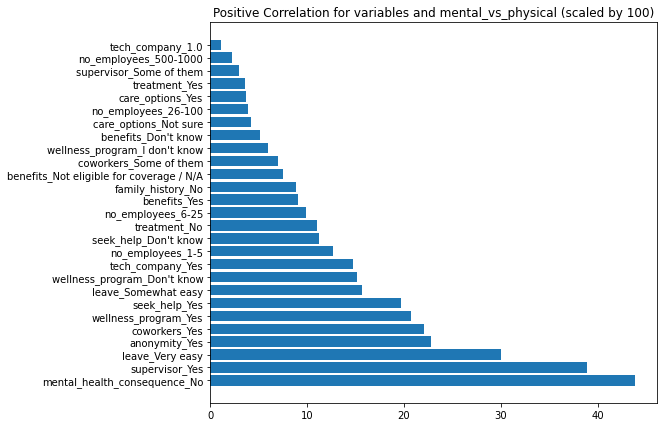

In [48]:
# positive correlation bar graph

plt.figure(figsize=(8,7))
plt.barh(positive_corr.index, 100*positive_corr['mental_vs_physical'])
plt.title('Positive Correlation for variables and mental_vs_physical (scaled by 100)');
plt.show()

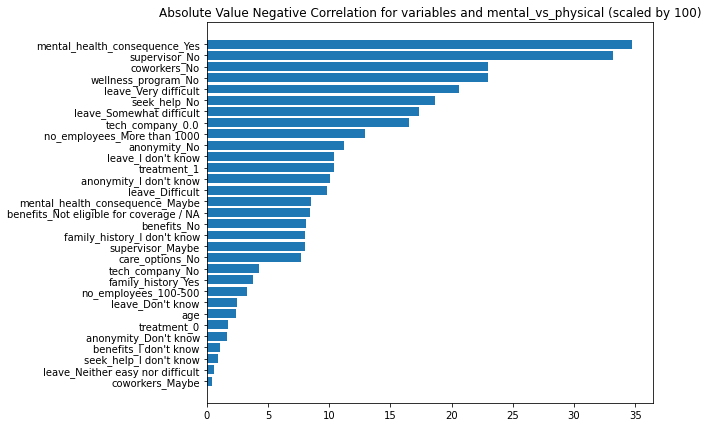

In [49]:
# negative correlation bar graph

plt.figure(figsize=(8,7))
plt.barh(negative_corr.index, abs(100*negative_corr['mental_vs_physical']))
plt.title('Absolute Value Negative Correlation for variables and mental_vs_physical (scaled by 100)');
plt.show()

In [50]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

sel.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False,  True])

In [51]:
selected_feat = X_train.columns[(sel.get_support())]
selected_feat

Index(['age', 'family_history_No', 'no_employees_26-100',
       'no_employees_More than 1000', 'tech_company_0.0', 'care_options_No',
       'wellness_program_No', 'wellness_program_Yes', 'seek_help_No',
       'seek_help_Yes', 'anonymity_Yes', 'leave_Somewhat easy',
       'leave_Very easy', 'mental_health_consequence_Maybe',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'coworkers_No', 'coworkers_Yes', 'supervisor_No', 'supervisor_Yes'],
      dtype='object')

In [52]:
Linear SVM, RBF SVM, and Polynomial SVM can bee compared with each other (see hw 2 i think)

SyntaxError: invalid syntax (<ipython-input-52-b237a18b2c59>, line 1)